# Calculate Distances Between Schools and Tournament Sites

## Import data and packages

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# import all geocoded results, including schools and tournament sites
allResults = pd.read_csv('../data/cleaned/geocoded_results.csv')
allResults

,seed,school_common_name,site,year,id,school_full_name,team,city,state,type,conference,address,lng,lat
0,1.0,Duke,"Columbia, SC",2019.0,20190,Duke University,Blue Devils,Durham,North Carolina,Private/Non-sectarian,Atlantic Coast Conference,Duke University Durham North Carolina,-78.944230,36.000156
1,1.0,Gonzaga,"Salt Lake City, UT",2019.0,20191,Gonzaga University,Bulldogs,Spokane,Washington,Private/Catholic,West Coast Conference,Gonzaga University Spokane Washington,-117.403044,47.666739
2,1.0,North Carolina,"Columbus, OH",2019.0,20192,University of North Carolina at Chapel Hill,Tar Heels,Chapel Hill,North Carolina,State,Atlantic Coast Conference,University of North Carolina at Chapel Hill Ch...,-79.047753,35.905035
3,1.0,Virginia,"Columbia, SC",2019.0,20193,University of Virginia,Cavaliers,Charlottesville,Virginia,State,Atlantic Coast Conference,University of Virginia Charlottesville Virginia,-78.505500,38.041058
4,2.0,Michigan State,"Des Moines, IA",2019.0,20194,Michigan State University,Spartans,East Lansing,Michigan,State,Big Ten Conference,Michigan State University East Lansing Michigan,-84.477916,42.718568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,NaN,NaN,"Albuquerque, NM",NaN,1985555,NaN,NaN,NaN,NaN,NaN,NaN,"Albuquerque, NM",-106.650985,35.084103
1116,NaN,NaN,"Hartford, CT",NaN,1985556,NaN,NaN,NaN,NaN,NaN,NaN,"Hartford, CT",-72.690855,41.764582
1117,NaN,NaN,"Tulsa, OK",NaN,1985557,NaN,NaN,NaN,NaN,NaN,NaN,"Tulsa, OK",-95.992911,36.155681
1118,NaN,NaN,"Dayton, OH",NaN,1985558,NaN,NaN,NaN,NaN,NaN,NaN,"Dayton, OH",-84.191607,39.758948


## Convert to GeoDataFrame

Using Shapely, latitude and longitude coordinates can be converted to Point geometry. Using the UTM 14N Coordinate Reference System will allow the distance between schools and sites to be calculated in meters rather than degrees.

In [2]:
# convert latitude and longitude to Point geometry
geoms = [Point(xy) for xy in zip(allResults.lng, allResults.lat)]

# UTM 14N CRS to calculate distance in meters
crs = {'init': 'epsg:32614'}  # UTM 14N for US

# convert to geodataframe
resultsGdf = gpd.GeoDataFrame(allResults, crs=crs, geometry=geoms)
resultsGdf

,seed,school_common_name,site,year,id,school_full_name,team,city,state,type,conference,address,lng,lat,geometry
0,1.0,Duke,"Columbia, SC",2019.0,20190,Duke University,Blue Devils,Durham,North Carolina,Private/Non-sectarian,Atlantic Coast Conference,Duke University Durham North Carolina,-78.944230,36.000156,POINT (-78.94423 36.00016)
1,1.0,Gonzaga,"Salt Lake City, UT",2019.0,20191,Gonzaga University,Bulldogs,Spokane,Washington,Private/Catholic,West Coast Conference,Gonzaga University Spokane Washington,-117.403044,47.666739,POINT (-117.40304 47.66674)
2,1.0,North Carolina,"Columbus, OH",2019.0,20192,University of North Carolina at Chapel Hill,Tar Heels,Chapel Hill,North Carolina,State,Atlantic Coast Conference,University of North Carolina at Chapel Hill Ch...,-79.047753,35.905035,POINT (-79.04775 35.90504)
3,1.0,Virginia,"Columbia, SC",2019.0,20193,University of Virginia,Cavaliers,Charlottesville,Virginia,State,Atlantic Coast Conference,University of Virginia Charlottesville Virginia,-78.505500,38.041058,POINT (-78.50550 38.04106)
4,2.0,Michigan State,"Des Moines, IA",2019.0,20194,Michigan State University,Spartans,East Lansing,Michigan,State,Big Ten Conference,Michigan State University East Lansing Michigan,-84.477916,42.718568,POINT (-84.47792 42.71857)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,NaN,NaN,"Albuquerque, NM",NaN,1985555,NaN,NaN,NaN,NaN,NaN,NaN,"Albuquerque, NM",-106.650985,35.084103,POINT (-106.65099 35.08410)
1116,NaN,NaN,"Hartford, CT",NaN,1985556,NaN,NaN,NaN,NaN,NaN,NaN,"Hartford, CT",-72.690855,41.764582,POINT (-72.69085 41.76458)
1117,NaN,NaN,"Tulsa, OK",NaN,1985557,NaN,NaN,NaN,NaN,NaN,NaN,"Tulsa, OK",-95.992911,36.155681,POINT (-95.99291 36.15568)
1118,NaN,NaN,"Dayton, OH",NaN,1985558,NaN,NaN,NaN,NaN,NaN,NaN,"Dayton, OH",-84.191607,39.758948,POINT (-84.19161 39.75895)


## Separate school and site data

The school and tournament site locations will be matched through their shared id, but it will be easier to iterate through the two simultaneously if the dataframes are separated. Furthermore, the dataframes will be saved separately.

In [3]:
# filter for site locations, which will have NA for seed values
sites = resultsGdf[resultsGdf.seed.isna()]

# filter for schools, which will have integers/non-NA values for the seed column
schools = resultsGdf[resultsGdf.seed.isna() == False]

## Calculate distance

With the locations set to the UTM 14N coordinate reference system, the school dataset can be iterated over, matched to the corresponding sites through a shared id, and the distance between the two calculated. The distance results are converted to miles.

In [4]:
# suppress warning for copying from slice of dataframe
pd.options.mode.chained_assignment = None  # default='warn'

# calculate distance between schools and sites with matching id
# find geometry column of school and site with each id - has to be further subset by the indexed value
# convert distance to miles
# distance = [schools.loc[schools.id == uid, 'geometry'][i]
#      .distance(sites.loc[sites.id == uid, 'geometry'][sites.loc[sites.id == uid, 'geometry'].index[0]])
#      * 100000/1609 for i, uid in enumerate(schools.id)]


In [5]:
# schools.crs = {'init': 'epsg:32614'}  # UTM 14N for US
# sites.crs = {'init': 'epsg:102005'}  # UTM 14N for US
# europe.to_crs(epsg=2154, inplace=True)
# schools = schools.to_crs('EPSG:4236')

# tmp = schools.to_crs('+proj=eqdc +lat_0=0 +lon_0=0 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')


# distance = [schools.loc[schools.id == uid, 'geometry'][i]
#      .distance(sites.loc[sites.id == uid, 'geometry'][sites.loc[sites.id == uid, 'geometry'].index[0]])
#      * 100000/1609 for i, uid in enumerate(schools.id)]

# schools['distance'] = distance
# schools.loc[schools.school_common_name == 'Syracuse']
# schools.plot()

# resultsGdf = gpd.GeoDataFrame(allResults, crs=crs, geometry=geoms)
# eq = '+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'
# wgs = {'init': 'epsg:4236'}
# tmp = gpd.GeoDataFrame(allResults, crs=wgs, geometry=geoms)

# # filter for site locations, which will have NA for seed values
# sites = tmp[tmp.seed.isna()]

# # filter for schools, which will have integers/non-NA values for the seed column
# schools = tmp[tmp.seed.isna() == False]

# distance = [schools.loc[schools.id == uid, 'geometry'][i]
#      .distance(sites.loc[sites.id == uid, 'geometry'][sites.loc[sites.id == uid, 'geometry'].index[0]])
#      * 100000/1609 for i, uid in enumerate(schools.id)]
# distance

import numpy as np
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

# 43.04912, -76.15124, 33.76923, -118.19429

# haversine_distance(43.04912, -76.15124, 33.76923, -118.19429) * 0.621371
# haversine_distance(39.10311, -84.51201, 38.04058, -84.50371) * 0.621371
distance = [haversine_distance(
    schools.loc[schools.id == uid, 'lat'][i],
    schools.loc[schools.id == uid, 'lng'][i],
    sites.loc[sites.id == uid, 'lat'][sites.loc[sites.id == uid, 'lat'].index[0]],
    sites.loc[sites.id == uid, 'lng'][sites.loc[sites.id == uid, 'lng'].index[0]]
) * 0.621371 for i, uid in enumerate(schools.id)]
# haversine_distance(38.02703575 -84.50481984038481, 39.10311, -84.51201) * 0.621371
# print(haversine_distance(43.04912, -76.15124, 38.25266, -85.75845) * 0.621371)

# schools['tmp'] = dist
# schools

## Apply distance list to school and site dataframes

In [6]:
# set distance as new column in schools dataframe
schools['distance'] = distance
sites['distance'] = distance

# check
schools.head()
schools.loc[schools.school_common_name == 'Syracuse']

,seed,school_common_name,site,year,id,school_full_name,team,city,state,type,conference,address,lng,lat,geometry,distance
89,3.0,Syracuse,"Buffalo, NY",2014.0,201489,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),139.187104
108,4.0,Syracuse,"San Jose, CA",2013.0,2013108,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),2416.716871
115,1.0,Syracuse,"Pittsburgh, PA",2012.0,2012115,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),267.761191
136,3.0,Syracuse,"Cleveland, OH",2011.0,2011136,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),303.291185
147,1.0,Syracuse,"Buffalo, NY",2010.0,2010147,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),139.187104
160,1.0,Syracuse,"Buffalo, NY",2009.0,2009160,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),139.187104
170,3.0,Syracuse,"Miami, FL",2009.0,2009170,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),1214.674672
238,4.0,Syracuse,"Worcester, MA",2005.0,2005238,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),226.495943
265,3.0,Syracuse,"Boston, MA",2003.0,2003265,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),261.883022
317,4.0,Syracuse,"Cleveland, OH",2000.0,2000317,Syracuse University,Orange,Syracuse,New York,Private/Methodist,Atlantic Coast Conference,Syracuse University Syracuse New York,-76.133309,43.038306,POINT (-76.13331 43.03831),303.291185


## Create duplicate dataframe with site coordinates/geometries

Each school will be plotted with all of its tournament sites. The `schools` dataframe can be duplicated and its geometries replaced with `sites` geometries.

In [7]:
# copy schools dataframe and drop columns we want to copy from sites dataframe
sitesAgg = schools.drop(['address', 'lng', 'lat', 'geometry'], axis = 1)

# replace old columns with site columns - list() is used to ignore indexes
sitesAgg['address'] = list(sites['address'])
sitesAgg['lng'] = list(sites.lng)
sitesAgg['lat'] = list(sites.lat)
sitesAgg['geometry'] = list(sites.geometry)
sitesAgg.head()

,seed,school_common_name,site,year,id,school_full_name,team,city,state,type,conference,distance,address,lng,lat,geometry
0,1.0,Duke,"Columbia, SC",2019.0,20190,Duke University,Blue Devils,Durham,North Carolina,Private/Non-sectarian,Atlantic Coast Conference,181.862864,"Columbia, SC",-81.034331,34.000749,POINT (-81.03433 34.00075)
1,1.0,Gonzaga,"Salt Lake City, UT",2019.0,20191,Gonzaga University,Bulldogs,Spokane,Washington,Private/Catholic,West Coast Conference,549.552940,"Salt Lake City, UT",-111.886798,40.759620,POINT (-111.88680 40.75962)
2,1.0,North Carolina,"Columbus, OH",2019.0,20192,University of North Carolina at Chapel Hill,Tar Heels,Chapel Hill,North Carolina,State,Atlantic Coast Conference,353.448252,"Columbus, OH",-83.000706,39.962260,POINT (-83.00071 39.96226)
3,1.0,Virginia,"Columbia, SC",2019.0,20193,University of Virginia,Cavaliers,Charlottesville,Virginia,State,Atlantic Coast Conference,312.854085,"Columbia, SC",-81.034331,34.000749,POINT (-81.03433 34.00075)
4,2.0,Michigan State,"Des Moines, IA",2019.0,20194,Michigan State University,Spartans,East Lansing,Michigan,State,Big Ten Conference,473.633831,"Des Moines, IA",-93.603715,41.591064,POINT (-93.60371 41.59106)


## Write to CSV

In [8]:
# schools.to_csv('../data/cleaned/distances-schools.csv', index=False)
# # csv will be pulled into QGIS to convert to geojson for final web mapping
# sitesAgg.to_csv('../data/cleaned/distances-sites.csv', index=False)

schools.to_csv('../data/edits/distances-schools-GCD.csv', index=False)
# csv will be pulled into QGIS to convert to geojson for final web mapping
sitesAgg.to_csv('../data/edits/distances-sites-GCD.csv', index=False)



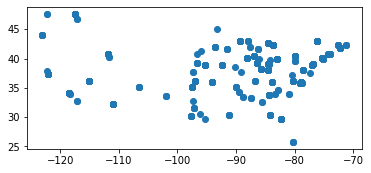

In [9]:
schools.plot()